## Desafio - Ifood 
---

Desafio proposto no módulo de Estatística Descritiva do curso EBA - Estatística do Básico ao Avançado da Professora Renata Biaggi. Mais informações, acesse o site: https://renatabiaggi.com/eba/

---

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

    • Perfis de clientes
    • Preferências do produto
    • Sucessos/fracassos da campanha
    • Desempenho do canal
---
O objetivo é fazer uma análise exploratória dos dados.

### Importando as bibliotecas

In [888]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Obtendo a base de dados

In [889]:
df = pd.read_csv('mkt_data.csv')

df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


### Explorando a base de dados

O seguinte dicionário de dados foi compartilhado sobre as informações da base de dados.

| Feature            | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| AcceptedCmp1        | 1 if customer accepted the offer in the 1st campaign, 0 otherwise            |
| AcceptedCmp2        | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise            |
| AcceptedCmp3        | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise            |
| AcceptedCmp4        | 1 if customer accepted the offer in the 4th campaign, 0 otherwise            |
| AcceptedCmp5        | 1 if customer accepted the offer in the 5th campaign, 0 otherwise            |
| Response (target)   | 1 if customer accepted the offer in the last campaign, 0 otherwise           |
| Complain            | 1 if customer complained in the last 2 years                                 |
| DtCustomer          | date of customer's enrollment with the company                               |
| Education           | customer's level of education                                                |
| Marital             | customer's marital status                                                    |
| Kidhome             | number of small children in customer's household                             |
| Teenhome            | number of teenagers in customer's household                                  |
| Income              | customer's yearly household income                                           |
| MntFishProducts     | amount spent on fish products in the last 2 years                            |
| MntMeatProducts     | amount spent on meat products in the last 2 years                            |
| MntFruits           | amount spent on fruits in the last 2 years                                   |
| MntSweetProducts    | amount spent on sweet products in the last 2 years                           |
| MntWines            | amount spent on wines in the last 2 years                                    |
| MntGoldProds        | amount spent on gold products in the last 2 years                            |
| NumDealsPurchases   | number of purchases made with discount                                       |
| NumCatalogPurchases | number of purchases made using catalogue                                     |
| NumStorePurchases   | number of purchases made directly in stores                                  |
| NumWebPurchases     | number of purchases made through company's web site                          |
| NumWebVisitsMonth   | number of visits to company's web site in the last month                     |
| Recency             | number of days since the last purchase                                       |


#### Quantos dados existem na base?

In [890]:
df.shape 

(2205, 44)

##### O conjunto de dados é composto por 2205 linhas x 44 colunas

#### Quais são as colunas numéricas?

In [891]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [892]:
colunas_numericas = df.select_dtypes(include=['number']).columns.to_list() #retorna as colunas com dados do tipo int ou float

colunas_numericas

['Unnamed: 0',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall',
 'kids',
 'expenses']

In [893]:
len(colunas_numericas) #conta a quantidade de elementos na lista

42

##### Existem 42 colunas numéricas no dataset que são as seguintes: 

['Unnamed: 0',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall',
 'kids',
 'expenses']

#### Existem dados duplicados na base?

A coluna 'Unnamed: 0' está replicando o índice e não está agregando informação à base, por isso será removida da base. Além de impactar diretamente na identificação de possíveis linhas duplicadas da base de dados.

In [894]:
df = df.drop('Unnamed: 0', axis = 1) #exclui a coluna 'Unnamed: 0'
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,58138.0,0,0,58,635,88,546,172,88,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,46344.0,1,1,38,11,1,6,2,1,6,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,71613.0,0,0,26,426,49,127,111,21,42,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,26646.0,1,0,26,11,4,20,10,3,5,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,58293.0,1,0,94,173,43,118,46,27,15,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,64014.0,2,1,56,406,0,30,0,0,8,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,56981.0,0,0,91,908,48,217,32,12,24,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,69245.0,0,1,8,428,30,214,80,30,61,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [895]:
df.duplicated().sum() #retorna a quantidade de linhas repetidas na base

np.int64(184)

In [896]:
df.duplicated().any() #retorna se existe alguma linha repetida na base

np.True_

##### Existem 184 linhas repetidas na base de dados que são as seguintes:

In [897]:
linhas_duplicadas = df[df.duplicated()] #cria um novo df com as linhas repetidas

linhas_duplicadas

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
77,38620.0,0,0,56,112,17,44,34,22,89,...,NaN,4.0,NaN,229,140,0,Together,Master,0,229
167,78497.0,0,0,44,207,26,447,75,0,223,...,NaN,NaN,NaN,755,532,1,Married,2n Cycle,0,755
267,51369.0,0,1,84,297,7,79,0,11,182,...,3.0,NaN,NaN,394,212,0,Together,Graduation,1,394
268,37760.0,0,0,20,84,5,38,150,12,28,...,3.0,NaN,NaN,289,261,0,Together,Graduation,0,289
346,37717.0,1,0,31,9,0,6,4,1,5,...,NaN,NaN,5.0,20,15,0,Married,PhD,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775.0,1,0,40,5,1,8,0,0,1,...,3.0,NaN,NaN,14,13,0,Together,Graduation,1,14
2188,75777.0,0,0,12,712,26,538,69,13,80,...,NaN,4.0,NaN,1358,1278,2,Single,Master,0,1358
2192,58554.0,1,1,55,368,24,68,38,0,88,...,3.0,NaN,NaN,498,410,0,Together,Graduation,2,498
2199,34421.0,1,0,81,3,3,7,6,2,9,...,3.0,NaN,NaN,21,12,0,Married,Graduation,1,21


Removendo as linhas duplicadas

In [898]:
df = df.drop_duplicates() #remove as linhas duplicadas

df.shape #verifica o resultado da remoção das linhas

(2021, 43)

#### Existem dados nulos na base? 

In [899]:
soma_nulos = df.isnull().sum() #cria serie com a contagem de nulos identificados

soma_nulos_filtro = soma_nulos[soma_nulos > 0] #filtro para exibir colunas onde foram localizados dados nulos

soma_nulos_filtro 


marital_Divorced        1807
marital_Married         1236
marital_Single          1578
marital_Together        1512
marital_Widow           1951
education_2n Cycle      1838
education_Basic         1972
education_Graduation    1006
education_Master        1686
education_PhD           1582
dtype: int64

Existem dados nulos nas colunas:  

marital_Divorced,  
marital_Married,  
marital_Single,  
marital_Together,  
marital_Widow,  
education_2n Cycle,  
education_Basic,  
education_Graduation,  
education_Master,  
education_PhD


Pelo nome das colunas, parece se tratar de características sobre as usuárias. 
Será avaliado com quais valores as colunas estão preenchidas.

In [900]:
colunas_com_nulos = ['marital_Divorced', 'marital_Married', 'marital_Single', 
                        'marital_Together', 'marital_Widow', 'education_2n Cycle', 
                        'education_Basic', 'education_Graduation', 'education_Master', 
                        'education_PhD']

df_nulos = df[colunas_com_nulos].describe() #Cria um df utilizando um filtro com as colunas que contém dados nulos

df_nulos

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
count,214.0,785.0,443.0,509.0,70.0,183.0,49.0,1015.0,335.0,439.0
mean,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0
25%,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0
50%,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0
75%,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0
max,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0


Como presumido, os valores indicam se as usuárias possuem ou não a caracterísca descrita pela coluna. Pode-se observar que nas colunas, os valores utilizados se repetem, indicando que a usuária possui a característica.

#### Como as colunas com nulos podem ser tratadas?

Para preservar a informação de que o valor estava ausente, serão criadas novas colunas booleanas para indicar as características.

In [901]:
df = df.copy() #Realizada uma cópia do df  para evitar problemas ao modificar um slice

for coluna in colunas_com_nulos:
    df.loc[:, coluna + '_is_null'] = df[coluna].isnull()

df


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Divorced_is_null,marital_Married_is_null,marital_Single_is_null,marital_Together_is_null,marital_Widow_is_null,education_2n Cycle_is_null,education_Basic_is_null,education_Graduation_is_null,education_Master_is_null,education_PhD_is_null
0,58138.0,0,0,58,635,88,546,172,88,88,...,True,True,False,True,True,True,True,False,True,True
1,46344.0,1,1,38,11,1,6,2,1,6,...,True,True,False,True,True,True,True,False,True,True
2,71613.0,0,0,26,426,49,127,111,21,42,...,True,True,True,False,True,True,True,False,True,True
3,26646.0,1,0,26,11,4,20,10,3,5,...,True,True,True,False,True,True,True,False,True,True
4,58293.0,1,0,94,173,43,118,46,27,15,...,True,False,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,True,True,False,True,True,True,True,False,True,True
2200,61223.0,0,1,46,709,43,182,42,118,247,...,True,False,True,True,True,True,True,False,True,True
2202,56981.0,0,0,91,908,48,217,32,12,24,...,False,True,True,True,True,True,True,False,True,True
2203,69245.0,0,1,8,428,30,214,80,30,61,...,True,True,True,False,True,True,True,True,False,True


#### Quais os valores de média, mediana e percentis das colunas numéricas?

In [902]:
colunas_numericas_de_interesse = [
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'Age',
 'kids',
 'expenses']

#lista com as colunas de interesse para as visualizar as estatísticas

In [903]:
df[colunas_numericas_de_interesse].describe() #Estatísticas das colunas de interesse

,Income,Kidhome,Teenhome,Recency,Age,kids,expenses
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,51.117269,0.952994,563.789213
std,20713.046401,0.536196,0.546393,28.950917,11.667616,0.746123,576.775749
min,1730.000000,0.000000,0.000000,0.000000,24.000000,0.000000,4.000000
25%,35416.000000,0.000000,0.000000,24.000000,43.000000,0.000000,55.000000
50%,51412.000000,0.000000,0.000000,49.000000,50.000000,1.000000,343.000000
75%,68274.000000,1.000000,1.000000,74.000000,61.000000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,80.000000,3.000000,2491.000000


### Analisando o perfil das clientes

#### Qual o maior salário encontrado na base?

In [904]:
df['Income'].max() #retona o maior valor da coluna 'Income'

np.float64(113734.0)

##### O maior salário na base é de R$ 113,734.00

#### Qual é a distribuição de salário?

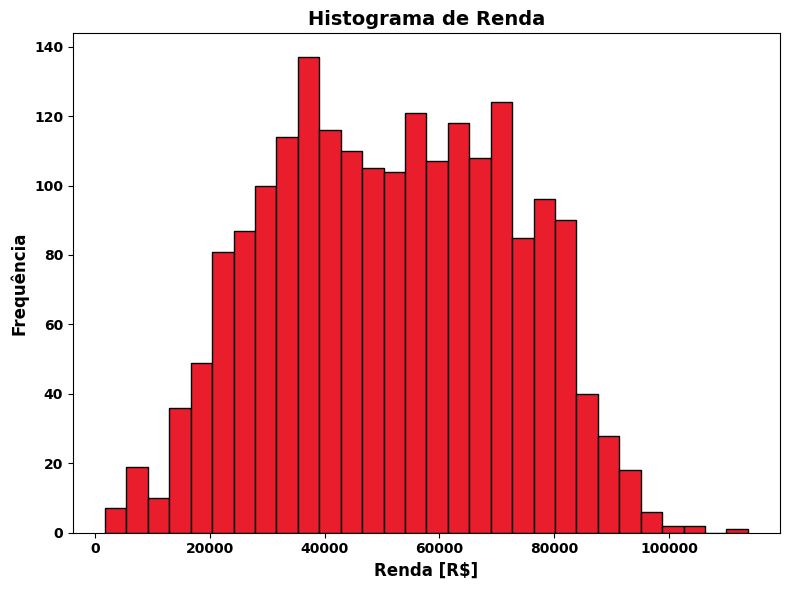

In [905]:
# Cria o histograma
plt.figure(figsize=(8, 6))
cor_ifood = '#EA1D2C' # Cor vermelha do iFood
plt.hist(df['Income'], bins=30, color=cor_ifood, edgecolor='black' )

# Adiciona os rótulos e título
plt.xlabel('Renda [R$]', fontsize=12, fontweight='bold')
plt.ylabel('Frequência', fontsize=12, fontweight='bold')
plt.title('Histograma de Renda', fontsize=14, fontweight='bold')

# Customiza o gráfico
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.tight_layout()

plt.show()


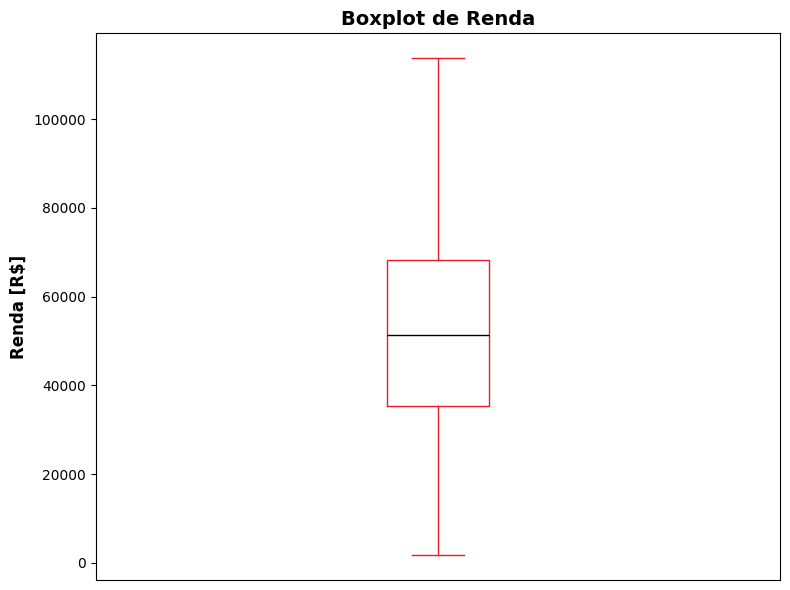

In [906]:
# Gera o boxplot
plt.figure(figsize=(8, 6))  # Defini o tamanho do gráfico
df['Income'].plot.box(color=dict(boxes=cor_ifood, whiskers=cor_ifood, medians='black', caps=cor_ifood))

# Adiciona título e rótulo do eixo
plt.title('Boxplot de Renda', fontsize=14, fontweight='bold')
plt.ylabel('Renda [R$]', fontsize=12, fontweight='bold')

# Customiza o layout
plt.xticks([])  # Remove o rótulo do eixo X
plt.tight_layout()

plt.show()


In [907]:
# calcula o coeficiente de variação
df["Income"].std()/df["Income"].mean()

np.float64(0.4007379553227728)

Quanto mais próximo de 1, maior é a variabilidade do conjunto de dados em relação à média.

In [908]:
df["Income"].skew() #calcula a skewness da distribuição

np.float64(0.004357040710783565)

O skewness é uma medida que indica a simetria ou falta de simetria de uma distribuição de dados. Quanto mais próximo de 0, mais simétria é a distribuição.

Os salários estão bem distribuídos, poucas pessoas ganham pouco e poucas ganham bastante. Apesar disso, a dispersão medida pelo coeficiente de variação é significativo, mostrando que existem vários dados distante da média. 
Com base no skewness e no boxplot, pode se dizer que a curva se assemelha a uma distribuição normal.

#### Nossos clientes tem níveis de educação maiores ou menores?

In [909]:
df['education_level'].value_counts()

education_level
Graduation    1015
PhD            439
Master         335
2n Cycle       183
Basic           49
Name: count, dtype: int64

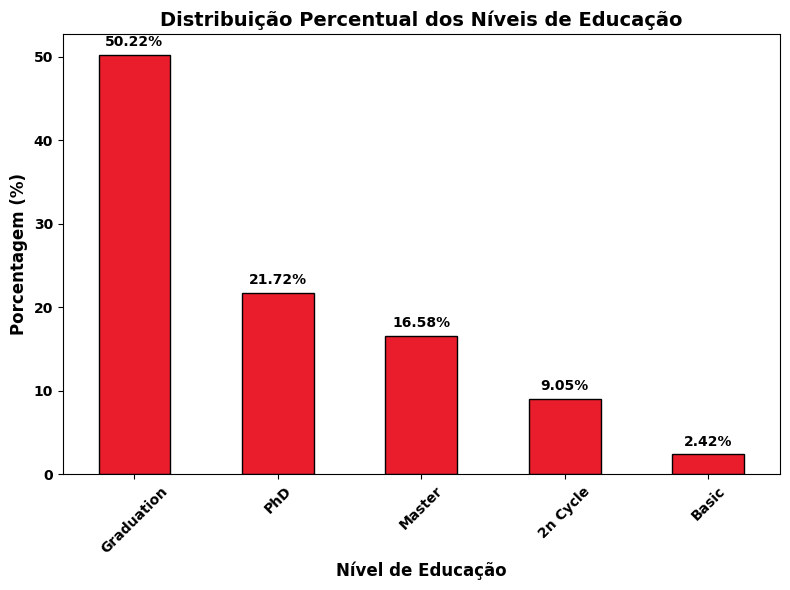

In [910]:
# Calcula as porcentagens
porcentagem_education_level = df['education_level'].value_counts(normalize=True) * 100

# Plota as porcentagens
plt.figure(figsize=(8, 6))
porcentagem_education_level.plot(kind='bar', color=cor_ifood, edgecolor='black')

# Configurações do eixo
plt.xlabel('Nível de Educação', fontsize=12, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=12, fontweight='bold')
plt.title('Distribuição Percentual dos Níveis de Educação', fontsize=14, fontweight='bold')

# Rotaciona e move os rótulos do eixo X
plt.xticks(rotation=45, ha='center', fontsize=10, fontweight='bold')

# Deixa os rótulos do eixo Y em negrito
plt.yticks(fontsize=10, fontweight='bold')

# Adiciona os valores percentuais acima das barras
for index, value in enumerate(porcentagem_education_level):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=10, color='black', fontweight='bold')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()


A maior parte das clientes tem o nível de graduação, seguido de doutorado e mestrado. Os clientes com nível superior representam 88.52% da base. 

#### Quantos clientes temos em cada estado civil?

In [911]:
df['marital_status'].value_counts()

marital_status
Married     785
Together    509
Single      443
Divorced    214
Widow        70
Name: count, dtype: int64

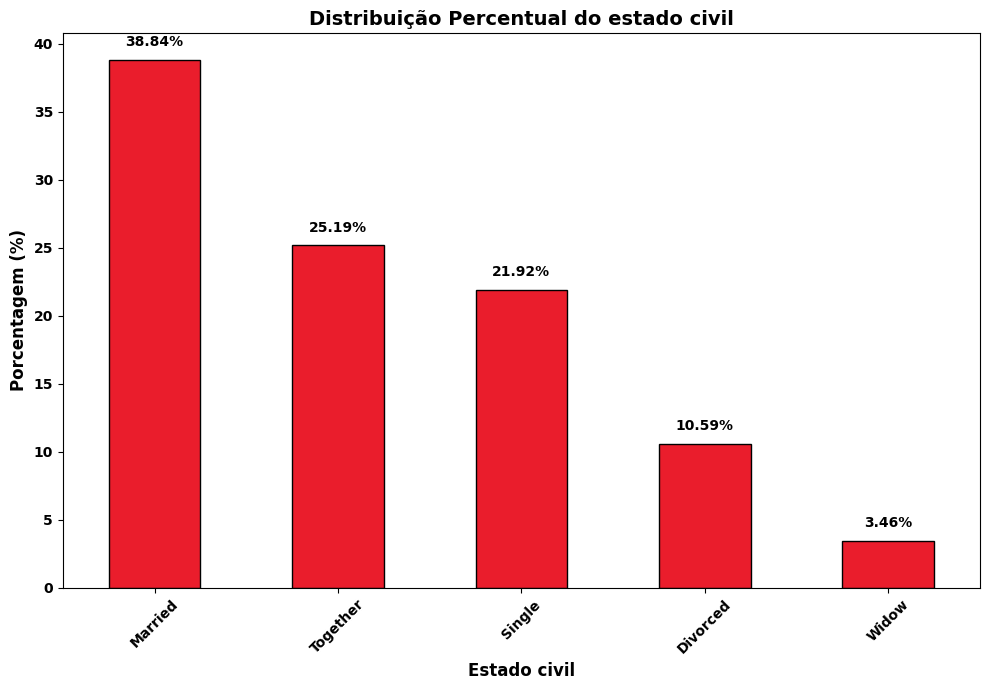

In [912]:
# Calcula as porcentagens
porcentagem_marital_status = df['marital_status'].value_counts(normalize=True) * 100

# Plota as porcentagens
plt.figure(figsize=(10, 7))
porcentagem_marital_status.plot(kind='bar', color=cor_ifood, edgecolor='black')

# Configurações do eixo
plt.xlabel('Estado civil', fontsize=12, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=12, fontweight='bold')
plt.title('Distribuição Percentual do estado civil', fontsize=14, fontweight='bold')

# Rotaciona e move os rótulos do eixo X
plt.xticks(rotation=45, ha='center', fontsize=10, fontweight='bold')

# Deixa os rótulos do eixo Y em negrito
plt.yticks(fontsize=10, fontweight='bold')

# Adiciona os valores percentuais acima das barras
for index, value in enumerate(porcentagem_marital_status):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=10, color='black', fontweight='bold')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

A maior parte dos clientes são casados ou moram juntos.

#### Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?

In [913]:
df.groupby('marital_status')['kids'].describe()


,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,214.0,1.023364,0.753344,0.0,1.0,1.0,1.0,3.0
Married,785.0,0.977070,0.724558,0.0,0.0,1.0,1.0,3.0
Single,443.0,0.860045,0.771850,0.0,0.0,1.0,1.0,3.0
Together,509.0,0.982318,0.748806,0.0,0.0,1.0,1.0,3.0
Widow,70.0,0.842857,0.734960,0.0,0.0,1.0,1.0,2.0


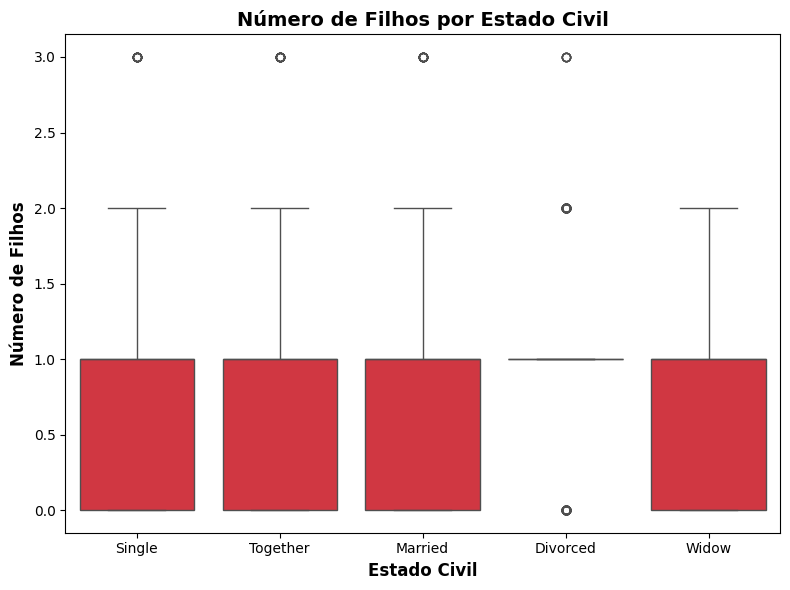

In [914]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='marital_status', y='kids', data=df, color=cor_ifood)

# Adiciona título e rótulos
plt.title('Número de Filhos por Estado Civil', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Estado Civil', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Número de Filhos', fontsize=12, fontweight='bold', color='black')

# Ajusta o layout 
plt.tight_layout()
plt.show()


Os números são muito próximos, olhando apenas a mean(media) pode-se observar que single (solteiro) tem uma quantidade menor de filhos quando comparado aos outros grupos. Mas, com base no boxplot existe grande sobreposição dos valores. Para poder afirmar se de fato a diferença existe seria necessário um teste de hipótese.

#### As pessoas gastam mais ou menos em na plataforma quando têm filhos?

In [915]:
df.groupby('kids')['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,567.0,1056.282187,622.282197,5.0,605.5,1114.0,1531.50,2491.0
1,1027.0,432.732230,450.304666,4.0,50.5,265.0,735.50,2036.0
2,382.0,223.267016,295.568285,8.0,39.0,84.0,295.75,1627.0
3,45.0,240.044444,407.638708,6.0,19.0,62.0,254.00,1601.0


In [916]:
df.groupby('kids')['expenses'].mean()

kids
0    1056.282187
1     432.732230
2     223.267016
3     240.044444
Name: expenses, dtype: float64

In [917]:
df.groupby('kids')['expenses'].median()

kids
0    1114.0
1     265.0
2      84.0
3      62.0
Name: expenses, dtype: float64

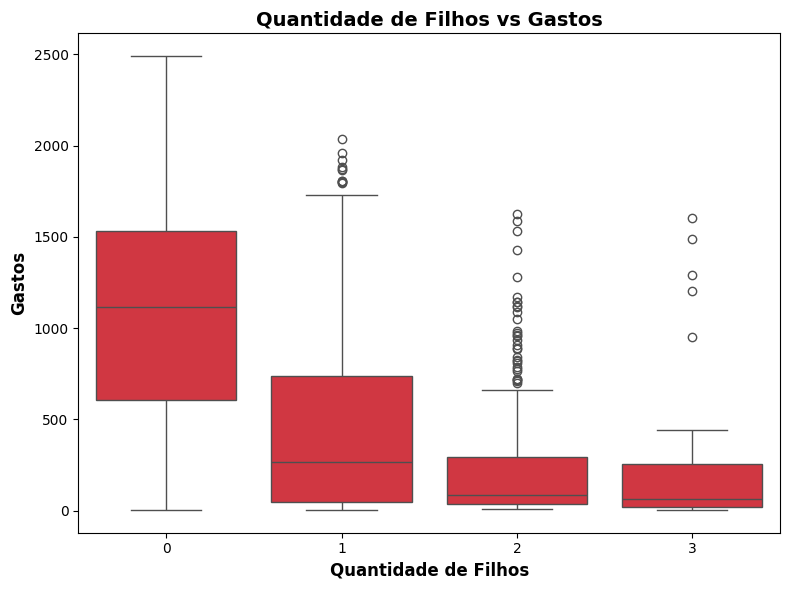

In [918]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='kids', y='expenses', data=df, color=cor_ifood)

# Adiciona título e rótulos
plt.title('Quantidade de Filhos vs Gastos', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Quantidade de Filhos', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Gastos', fontsize=12, fontweight='bold', color='black')

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()

Podemos observar que tanto a média quanto a mediana para 0 e 1 filho são mais elevadas nessa amostra de dados. No entanto, a média para 2 filhos é menor do que para 3 filhos, enquanto a mediana para 2 filhos supera a de 3 filhos. Tanto os grupos de 2 quanto de 3 filhos apresentam médias significativamente mais altas do que suas medianas, sugerindo a presença de outliers superiores (como o próprio gráfico demonstra). O grupo de 1 filho também possui outliers superiores, embora a diferença seja menos marcante. Já as pessoas sem filhos apresentam uma distribuição um pouco mais próxima de uma normal, sem outliers, e com a mediana levemente centralizada no boxplot.


#### Clentes que têm um maior salário gastam mais?

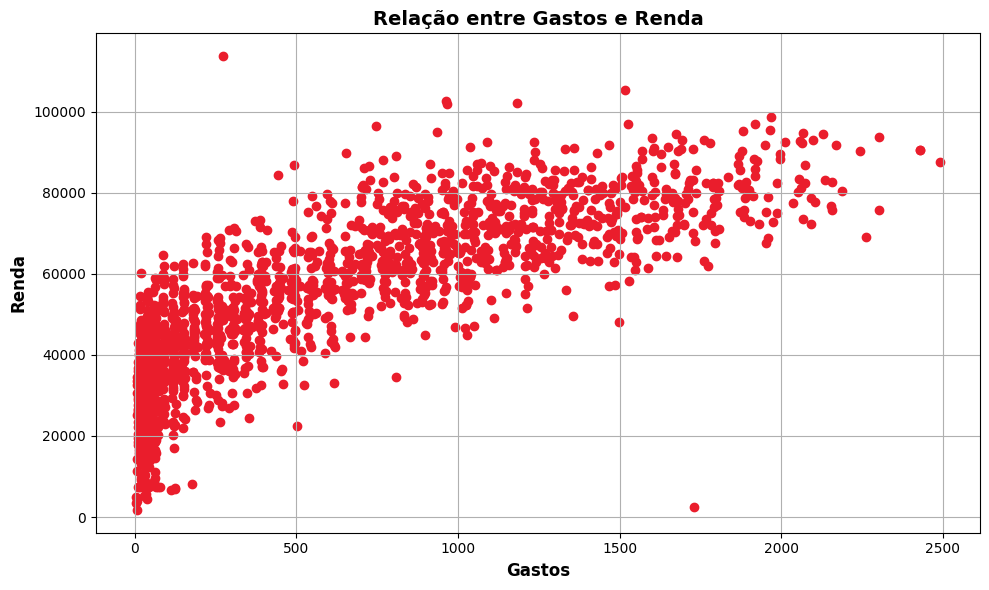

In [919]:
# Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
plt.scatter(df["expenses"], df["Income"], color=cor_ifood) 

# Adicionar títulos e rótulos
plt.title('Relação entre Gastos e Renda', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Gastos', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Renda', fontsize=12, fontweight='bold', color='black')

# Ajustar a visibilidade
plt.grid(True)  # Adiciona uma grade para facilitar a visualização
plt.tight_layout()  # Ajusta layout para evitar sobreposições

# Mostrar o gráfico
plt.show()


In [920]:
df["expenses"].corr(df["Income"]) #Correlação de Pearson

np.float64(0.8192029927546325)

0.819 é um valor relativamente alto (próximo de 1), o que indica que, à medida que a renda aumenta, as despesas tendem a aumentar de forma significativa.

### Explorando outras informações da base de dados

Até o momento foram exploradas algumas características do perfil dos clientes, mas novas questionamentos surgiram ao analisar as outras colunas da base de dados.

- A idade influencia no padrão de consumo? 
- Qual a distribuição de renda entre os clientes?
- Quais produtos ou serviços são mais consumidos pelos clientes? O padrão se mantém para todas as faixas de renda?


#### A idade influencia no padrão de consumo? 

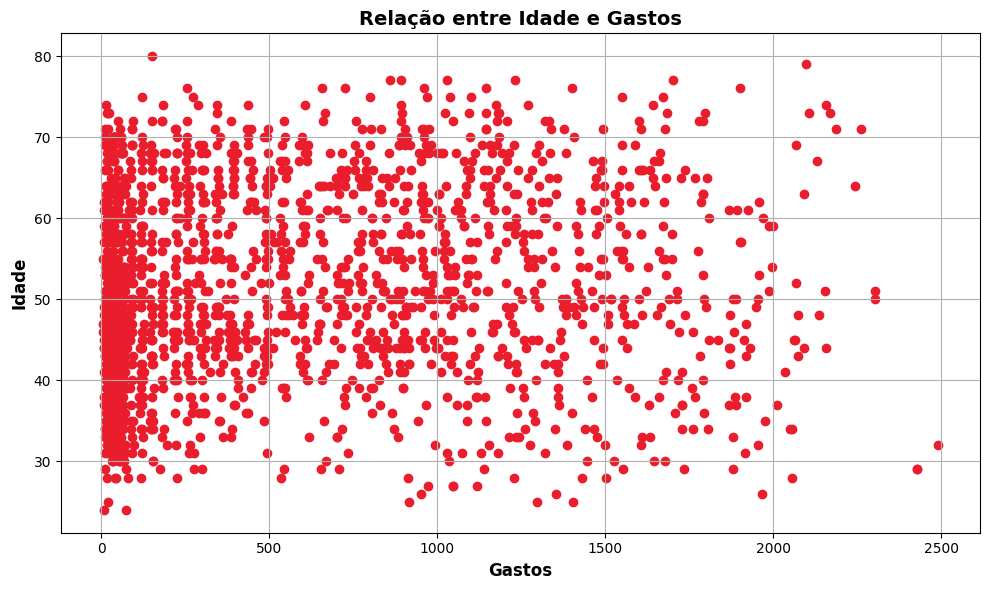

In [921]:
# Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
plt.scatter(df["expenses"], df["Age"], color=cor_ifood) 

# Adicionar títulos e rótulos
plt.title('Relação entre Idade e Gastos', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Gastos', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Idade', fontsize=12, fontweight='bold', color='black')

# Ajustar a visibilidade
plt.grid(True)  # Adiciona uma grade para facilitar a visualização
plt.tight_layout()  # Ajusta layout para evitar sobreposições

# Mostrar o gráfico
plt.show()

In [922]:
df["Age"].corr(df["Income"]) #Correlação de Pearson


np.float64(0.21637169418003785)

O valor de correlação obtido mostra uma correlação fraca entre as variáveis Idade e Gastos.

#### Qual a distribuição de renda entre os clientes?

Para esta análise, os clientes serão classificados de acordo com a renda. Os valores utilizados foram escolhidos de forma arbitrária, apenas para fins de exercício da análise.  

Baixa Renda : até 30.000  
Media Renda : Entre 30.000 e 80.000  
Alta Renda: Acima de 80.000

In [923]:
# Limites das faixas de renda
bins = [0, 30000, 80000, float('inf')]  # Limites das faixas
labels = ['Baixa Renda', 'Média Renda', 'Alta Renda']  # Nomes das faixas

# Cria uma nova coluna no DataFrame com a faixa de renda
df['Faixa de Renda'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)


In [924]:
df.groupby('Faixa de Renda', observed = True)['expenses'].describe()


,count,mean,std,min,25%,50%,75%,max
Faixa de Renda,,,,,,,,
Baixa Renda,337.0,55.801187,106.617888,4.0,22.00,38.0,55.0,1729.0
Média Renda,1494.0,564.417671,513.168348,6.0,91.00,395.0,912.5,2304.0
Alta Renda,190.0,1459.857895,433.289223,274.0,1160.75,1483.5,1790.0,2491.0


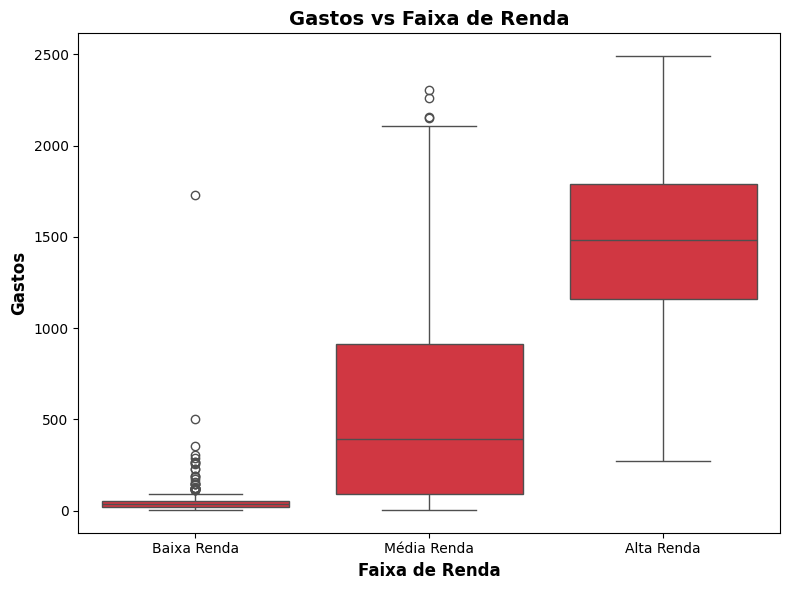

In [925]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Faixa de Renda', y='expenses', data=df, color=cor_ifood)

# Adiciona título e rótulos
plt.title('Gastos vs Faixa de Renda', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Faixa de Renda', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Gastos', fontsize=12, fontweight='bold', color='black')

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()

As medianas de gastos aumentam conforme as faixas de renda. A categoria de baixa renda apresenta outliers que elevam a média, tornando-a superior à mediana. Esse mesmo comportamento entre média e mediana é observado na faixa de média renda. Por outro lado, na faixa de alta renda, os valores de média e mediana são próximos, e não há presença de outliers.

#### Quais produtos ou serviços são mais consumidos pelos clientes? O padrão se mantém para todas as faixas de renda?


Ao analisar as colunas da base de dados, pode-se notar e validar que o valor de 'expenses' poderia ser avaliado através de categorias. Sendo elas: 'MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines'

##### Verificação da consistência dos dados

In [926]:
categorias_tipos_produtos = ['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines']

categorias_gold_regular = ['MntGoldProds', 'MntRegularProds']

In [927]:
# Somando os valores de categorias_tipos_produtos
df['soma_tipos_produtos'] = df[categorias_tipos_produtos].sum(axis=1)

# Somando os valores de categorias_gold_regular
df['soma_gold_regular'] = df[categorias_gold_regular].sum(axis=1)

# Verificando se o somatório de ambos é igual a 'expenses' e 'MntTotal'
df['check_tipos_vs_expenses'] = df['soma_tipos_produtos'] == df['expenses']
df['check_gold_regular_vs_expenses'] = df['soma_gold_regular'] == df['expenses']
df['check_tipos_vs_total'] = df['soma_tipos_produtos'] == df['MntTotal']
df['check_gold_regular_vs_total'] = df['soma_gold_regular'] == df['MntTotal']

# Exibindo o DataFrame para verificar os resultados
df[['soma_tipos_produtos', 'soma_gold_regular', 'expenses', 'MntTotal', 
    'check_tipos_vs_expenses', 'check_gold_regular_vs_expenses', 
    'check_tipos_vs_total', 'check_gold_regular_vs_total']]


,soma_tipos_produtos,soma_gold_regular,expenses,MntTotal,check_tipos_vs_expenses,check_gold_regular_vs_expenses,check_tipos_vs_total,check_gold_regular_vs_total
0,1529,1529,1529,1529,True,True,True,True
1,21,21,21,21,True,True,True,True
2,734,734,734,734,True,True,True,True
3,48,48,48,48,True,True,True,True
4,407,407,407,407,True,True,True,True
...,...,...,...,...,...,...,...,...
2198,19,19,19,19,True,True,True,True
2200,1094,1094,1094,1094,True,True,True,True
2202,1217,1217,1217,1217,True,True,True,True
2203,782,782,782,782,True,True,True,True


In [928]:
df['check_tipos_vs_expenses'].all()  # Retorna True se todos os valores forem True

np.True_

In [929]:
df['check_gold_regular_vs_expenses'].all()

np.True_

In [930]:
df['check_gold_regular_vs_expenses'].all()


np.True_

In [931]:

df['check_gold_regular_vs_total'].all()

np.True_

Todas as verificação foram verdadeiras, então de fato o valor de expenses está detalhado nas categorias.

##### Gastos vs Categorias vs Faixa de Renda

In [932]:
# Soma o total gasto por categoria para todas as faixas de renda
total_categoria_geral = df[categorias_tipos_produtos].sum()

# Somar o total de despesas de todos os clientes
total_expense_geral = df['expenses'].sum()

# Calcula a porcentagem de cada categoria em relação ao total de despesas geral
percentage_consumption_geral = (total_categoria_geral / total_expense_geral) * 100

percentage_consumption_geral['Total'] = percentage_consumption_geral.sum()

# Exibir o resultado
percentage_consumption_geral

MntFishProducts       6.669809
MntMeatProducts      29.454248
MntFruits             4.676335
MntSweetProducts      4.836680
MntWines             54.362929
Total               100.000000
dtype: float64

In [933]:
# Calcula o consumo médio por faixa de renda para cada categoria
mean_consumption_by_income = df.groupby('Faixa de Renda', observed=True)[categorias_tipos_produtos].mean()

# Calcula o gasto total médio por faixa de renda
total_expense_by_income = df.groupby('Faixa de Renda', observed=True)['MntTotal'].mean()

# Calcula a porcentagem de cada categoria em relação ao total de gastos da respectiva faixa de renda
percentage_consumption_by_income = (mean_consumption_by_income.div(total_expense_by_income, axis=0)) * 100

# Adiciona uma coluna 'Total' com o somatório das porcentagens para cada faixa de renda
percentage_consumption_by_income['Total'] = percentage_consumption_by_income.sum(axis=1)

percentage_consumption_by_income



,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,Total
Faixa de Renda,,,,,,
Baixa Renda,14.240893,39.728796,10.220686,11.188514,24.621111,100.0
Média Renda,6.570371,27.082918,4.561216,4.570703,57.214791,100.0
Alta Renda,6.458812,35.966731,4.650417,5.214639,47.709402,100.0


In [934]:
# Convertendo o resultado geral para um DataFrame
df_geral = pd.DataFrame(percentage_consumption_geral).T
df_geral.index = ['Geral']  # Renomear o índice para 'Geral'

# Concatenar o resultado geral com o das faixas de renda
geral_vs_faixas_de_renda = pd.concat([percentage_consumption_by_income, df_geral])

# Exibe o resultado
geral_vs_faixas_de_renda

,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,Total
Baixa Renda,14.240893,39.728796,10.220686,11.188514,24.621111,100.0
Média Renda,6.570371,27.082918,4.561216,4.570703,57.214791,100.0
Alta Renda,6.458812,35.966731,4.650417,5.214639,47.709402,100.0
Geral,6.669809,29.454248,4.676335,4.836680,54.362929,100.0


Baixa Renda: A maior parte dos gastos vai para produtos de carne, com um gasto considerável em vinhos.  
Média Renda: Gasto elevado em vinhos (mais de 57%), com produtos de carne sendo a segunda maior categoria.  
Alta Renda: Gasto ainda alto em vinhos (47%), mas com produtos de carne também representando uma parte significativa (36%).  
Geral: Vinhos dominam o consumo (mais de 54% do total), com produtos de carne na segunda posição (29%).


Consideração: A ausência de detalhes sobre a amostragem dos dados levanta dúvidas sobre a representatividade da análise. Isso pode influenciar os resultados e levar a conclusões menos precisas, uma vez que vieses na coleta de dados podem distorcer o comportamento de consumo observado nas diferentes faixas de renda.